<a href="https://colab.research.google.com/github/moizarsalan/Data-Anaylsis/blob/main/LA_Crime_and_data_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
# Optional: Interactive plotting (if using Plotly later)
# import plotly.express as px


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Crime_Data_from_2020_to_Present_20250707.csv')


In [ ]:
df.shape

(1004989, 28)

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [ ]:
df.isnull().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [ ]:
df = df[['DATE OCC', 'TIME OCC', 'Crm Cd Desc', 'AREA NAME', 'LAT', 'LON']]
df.dropna(inplace=True)

In [ ]:
df.shape

(1004989, 6)

In [ ]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

In [ ]:
df['Hour'] = pd.to_datetime(df['TIME OCC'], format='%H%M', errors='coerce').dt.hour

In [ ]:
df['Month'] = df['DATE OCC'].dt.month
df['DayOfWeek'] = df['DATE OCC'].dt.dayofweek

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe(include='all')

,DATE OCC,TIME OCC,Crm Cd Desc,AREA NAME,LAT,LON,Hour,Month,DayOfWeek
count,983462,983462.000000,983462,983462,983462.000000,983462.000000,983462.000000,983462.000000,983462.000000
unique,NaN,NaN,140,21,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,VEHICLE - STOLEN,Central,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,113023,68456,NaN,NaN,NaN,NaN,NaN
mean,2022-05-14 12:35:03.198699776,1369.191912,NaN,NaN,33.997216,-118.086953,14.288080,6.374796,3.023200
min,2020-01-01 00:00:00,10.000000,NaN,NaN,0.000000,-118.667600,1.000000,1.000000,0.000000
25%,2021-04-06 00:00:00,930.000000,NaN,NaN,34.014900,-118.430600,10.000000,3.000000,1.000000
50%,2022-05-27 00:00:00,1430.000000,NaN,NaN,34.059100,-118.322500,15.000000,6.000000,3.000000
75%,2023-06-23 00:00:00,1900.000000,NaN,NaN,34.164900,-118.273900,19.000000,9.000000,5.000000
max,2025-05-29 00:00:00,2359.000000,NaN,NaN,34.334300,0.000000,23.000000,12.000000,6.000000


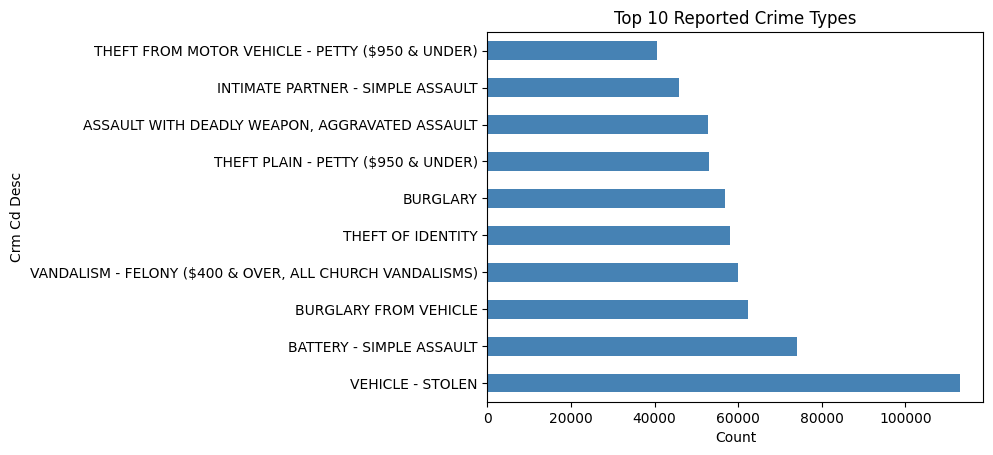

In [ ]:
df['Crm Cd Desc'].value_counts().head(10).plot(kind='barh', color='steelblue')
plt.title('Top 10 Reported Crime Types')
plt.xlabel('Count')
plt.show()

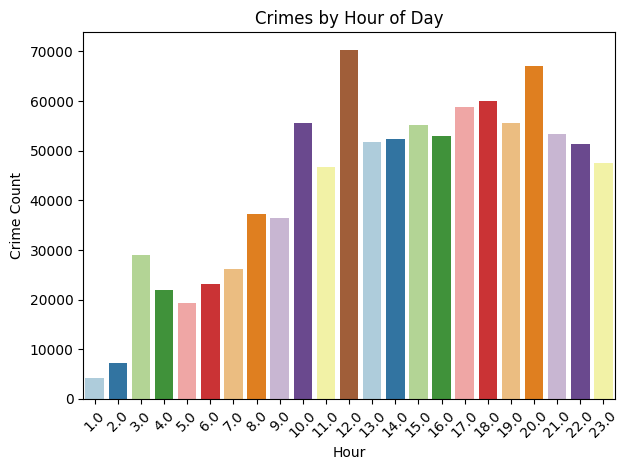

In [ ]:
sns.countplot(x='Hour', data=df, palette='Paired')
plt.title('Crimes by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

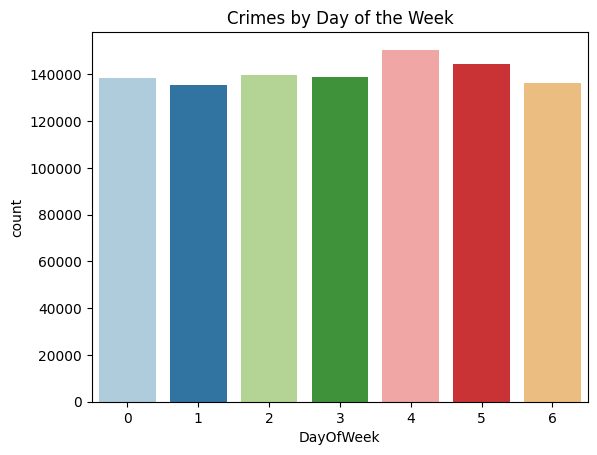

In [ ]:
sns.countplot(x='DayOfWeek', data=df, palette='Paired')
plt.title('Crimes by Day of the Week')
plt.show()

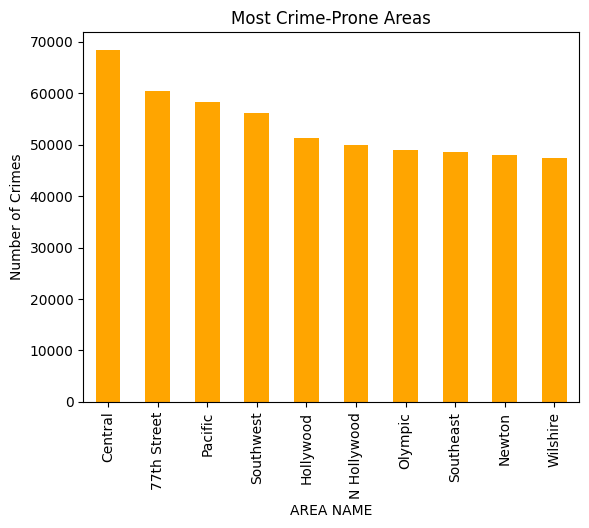

In [ ]:
df['AREA NAME'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Most Crime-Prone Areas')
plt.ylabel('Number of Crimes')
plt.show()

In [ ]:
import folium

m = folium.Map(location=[34.05, -118.25], zoom_start=10)

for _, row in df.sample(500).iterrows():
    folium.CircleMarker([row['LAT'], row['LON']], radius=2, color='red').add_to(m)

m

In [ ]:
le = LabelEncoder()
df['Crime_Label'] = le.fit_transform(df['Crm Cd Desc'])

In [ ]:
features = ['Hour', 'Month', 'DayOfWeek', 'LAT', 'LON']
X = df[features]
y = df['Crime_Label']

In [ ]:
# Count crime label occurrences
crime_counts = y.value_counts()

# Keep only crimes that appear >= 20 times
valid_crimes = crime_counts[crime_counts >= 20].index

# Filter both X and y accordingly
X_filtered = X[y.isin(valid_crimes)]
y_filtered = y[y.isin(valid_crimes)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, stratify=y_filtered, test_size=0.2, random_state=42)

In [ ]:
# Use only a subset for testing
X_small = X_train.sample(10000, random_state=42)
y_small = y_train.loc[X_small.index]

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_small, y_small)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       506
           1       0.00      0.00      0.00       214
           2       0.08      0.09      0.08     10564
           3       0.02      0.01      0.01       959
           4       0.09      0.11      0.10     14809
           5       0.00      0.00      0.00        51
           6       0.02      0.01      0.01       510
           7       0.01      0.00      0.01       802
          11       0.04      0.02      0.03      1614
          13       0.00      0.00      0.00        29
          14       0.02      0.01      0.01        94
          15       0.02      0.01      0.01      2882
          17       0.02      0.02      0.02        63
          18       0.01      0.01      0.01      1197
          19       0.00      0.00      0.00       401
          20       0.10      0.10      0.10     11351
          21       0.13      0.15      0.14     12450
          22       0.00    

In [ ]:
from sklearn.cluster import KMeans

coords = df[['LAT', 'LON']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(coords)

In [ ]:
import folium

# Step 1: Create a base map
cluster_map = folium.Map(location=[34.05, -118.25], zoom_start=10)

# Step 2: Define colors and cluster labels
colors = ['red', 'blue', 'green', 'purple', 'orange']
cluster_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4'}

# Step 3: Plot circle markers
for _, row in df.sample(500).iterrows():
    cluster_id = row['Cluster']
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=3,
        color=colors[cluster_id],
        fill=True,
        fill_opacity=0.7
    ).add_to(cluster_map)

# Step 4: Add HTML legend
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 150px; height: 140px;
    border:2px solid grey; z-index:9999; font-size:14px;
    background-color:white; padding: 10px;
">
<b>Cluster Legend</b><br>
<i style="background:red;color:red">ooo</i> Cluster 0<br>
<i style="background:blue;color:blue">ooo</i> Cluster 1<br>
<i style="background:green;color:green">ooo</i> Cluster 2<br>
<i style="background:purple;color:purple">ooo</i> Cluster 3<br>
<i style="background:orange;color:orange">ooo</i> Cluster 4
</div>
'''

cluster_map.get_root().html.add_child(folium.Element(legend_html))
cluster_map


In [ ]:
# Group by Cluster and Crime Type to count occurrences
crime_cluster_counts = df.groupby(['Cluster', 'Crm Cd Desc']).size().reset_index(name='Count')

# For each cluster, get the crime with the highest count
dominant_crimes = crime_cluster_counts.loc[
    crime_cluster_counts.groupby('Cluster')['Count'].idxmax()
].sort_values('Cluster')

# Display the result
print(dominant_crimes)

     Cluster               Crm Cd Desc  Count
128        0          VEHICLE - STOLEN  26514
137        1  BATTERY - SIMPLE ASSAULT    356
319        2          VEHICLE - STOLEN  10282
456        3          VEHICLE - STOLEN  54629
585        4          VEHICLE - STOLEN  21541


In [ ]:
# Create hour bins
df['Hour'] = df['TIME OCC'].astype(str).str.zfill(4).str[:2].astype(int)

In [ ]:
# Group by area and hour
area_hour_crime = df.groupby(['AREA NAME', 'Hour'])['Crm Cd Desc'].count().unstack().fillna(0)

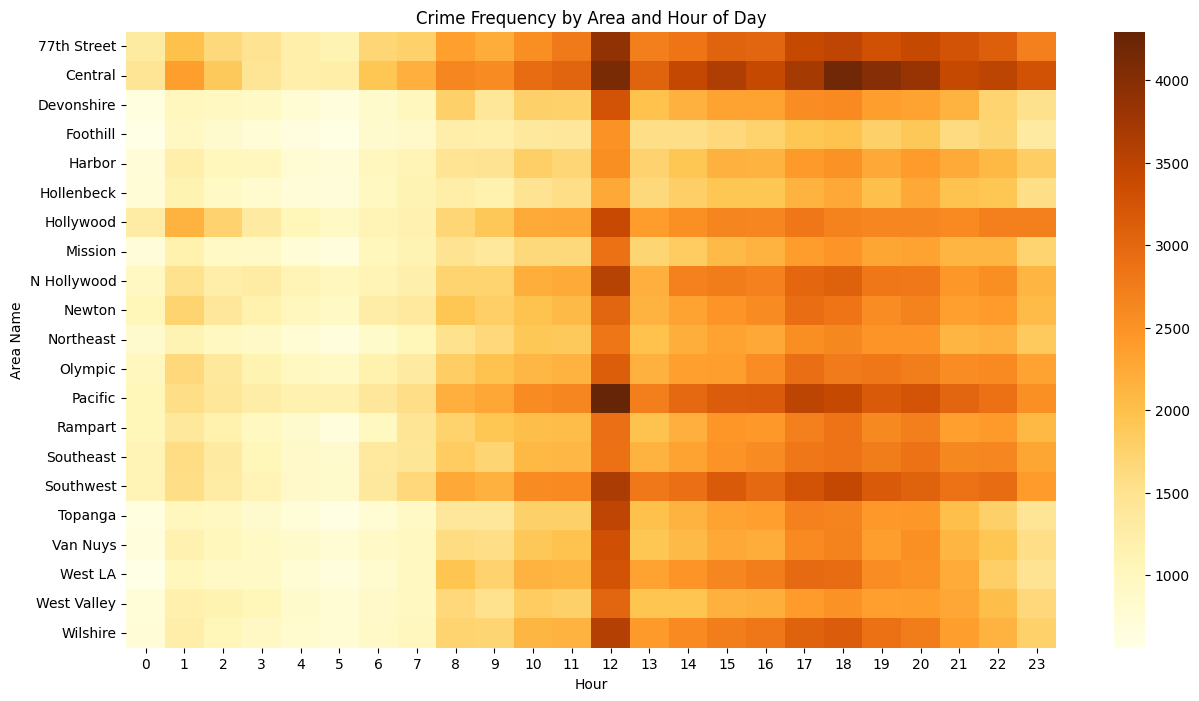

In [ ]:
# Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(area_hour_crime, cmap='YlOrBr')
plt.title("Crime Frequency by Area and Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Area Name")
plt.show()